## Final Project Submission

Please fill out:
* Student name: Rahim Njagi
* Student pace: self paced / part time / full time: Hybrid
* Scheduled project review date/time: 14-06-2024
* Instructor name: Antony Muiko
* Blog post URL:


# Analysis of the Aviation Dataset by the National Transport Safety


## Business Understanding

In this Project,we are dealing with a Dataset related to Aviation Accidents to get information on factors affecting accidents in the Aviation Industry.The main goal of the project is to investigate which Aircrafts have the lowest risk of accidents for the company to invest in.The Dataset  various aspects such as Aircraft Model,Make,Weather Condition and location where the accident occurred.

## Data Understandng

### Source   :
The Dataset ('Aviation_data.csv') was provided by the National Transport Safety on the occurence of Aviation accidents obtained 
           from Kaggle.
           
### Contents:
The Data contained in the Dataset is about occurrence of accidents , the aircraft make and model and some factors that may 
           contribute to accidents such as weather conditions.

           
### Format : 
The Data obtained is in CSV format containing rows and columns.          

## Data Preparation

We first start by loading our Dataset and start by investigating it to check for missing values and duplicates which may affect our overall analysis.

In [1]:
#We first start by importing libraries that we use to load and read the dataset.
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df= pd.read_csv('Aviation_data.csv',encoding = 'latin1') 
df

/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_52998/4083355492.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Aviation_data.csv',encoding = 'latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
""" 
First we would like to insepct the dataframe and get more information.
We would use the  .info() method to get the summary of the data set

"""
df.info()

#Our dataset contains a total of 90348 entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

#### Checking for missing values.

In [4]:

df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [5]:
"""
We would like to inspect how our Data Frame looks like.We would use the .shape() to show the number of rows and columns

"""
df.shape

#Our dataset contains 90438 rows and 31 columns

(90348, 31)

In [6]:
#Dropping duplicates in the DataFrame.
df = df.drop_duplicates()


In [7]:
#Dropping columns with many missing values (50%)
#Such columns are irrelevant as they are not useful
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [8]:
#Filling Numerical values with the mean
df['Number.of.Engines'].fillna(df['Number.of.Engines'].mean(), inplace = True)
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].mean(), inplace = True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].mean(), inplace = True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].mean(), inplace = True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].mean(), inplace = True)

/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_52998/2723403893.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number.of.Engines'].fillna(df['Number.of.Engines'].mean(), inplace = True)
/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_52998/2723403893.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

In [9]:
#Filling Categorical missing values with a placeholder.(NaN)
categorical_columns = ['Investigation.Type', 'Location', 'Country', 'Airport.Code', 'Airport.Name',
                       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
                       'Amateur.Built', 'Engine.Type', 'FAR.Description', 'Schedule', 
                       'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Broad.phase.of.flight', 
                       'Report.Status']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna('NaN')


In [10]:
df.isna().sum()

Event.Id                     69
Investigation.Type            0
Accident.Number              69
Event.Date                   69
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1451
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          15299
dtype: int64

In [11]:
#Changing Date columns to datetime format and filling missing values with  a placeholder.
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce').fillna(pd.Timestamp('1900-01-01'))
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce').fillna(pd.Timestamp('1900-01-01'))


/var/folders/pr/j40mx__d147dr4btk2kxr3j80000gp/T/ipykernel_52998/2677808396.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce').fillna(pd.Timestamp('1900-01-01'))


In [12]:
df.isna().sum()

Event.Id                    69
Investigation.Type           0
Accident.Number             69
Event.Date                   0
Location                     0
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Registration.Number       1451
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64

In [13]:
selected_columns = [
                   
                     'Investigation.Type',           
                     'Event.Date',                  
                     'Location',                    
                     'Country',                    
                     'Airport.Code',                
                     'Airport.Name',                 
                     'Injury.Severity',              
                     'Aircraft.damage',                     
                     'Make',                         
                     'Model',                        
                     'Amateur.Built',                
                     'Number.of.Engines',            
                     'Engine.Type',                  
                     'Purpose.of.flight',           
                     'Total.Fatal.Injuries',         
                     'Total.Serious.Injuries',       
                     'Total.Minor.Injuries',         
                     'Total.Uninjured',              
                     'Weather.Condition',            
                     'Broad.phase.of.flight',        
                     'Report.Status',                
                     'Publication.Date',  
]
selected_columns

['Investigation.Type',
 'Event.Date',
 'Location',
 'Country',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'Purpose.of.flight',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

In [14]:
df_2 = df[selected_columns]
df_2

,Investigation.Type,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Make,Model,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,Stinson,108-3,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,1900-01-01
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,Piper,PA24-180,...,Reciprocating,Personal,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,1996-09-19
2,Accident,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,Cessna,172M,...,Reciprocating,Personal,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,2007-02-26
3,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,Rockwell,112,...,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,2000-09-12
4,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,Cessna,501,...,NaN,Personal,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,1980-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,2022-12-26,"Annapolis, MD",United States,NaN,NaN,Minor,NaN,PIPER,PA-28-151,...,NaN,Personal,0.0,1.000000,0.000000,0.00000,NaN,NaN,NaN,2022-12-29
90344,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,BELLANCA,7ECA,...,NaN,NaN,0.0,0.000000,0.000000,0.00000,NaN,NaN,NaN,1900-01-01
90345,Accident,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,...,NaN,Personal,0.0,0.000000,0.000000,1.00000,VMC,NaN,NaN,2022-12-27
90346,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,CESSNA,210N,...,NaN,Personal,0.0,0.000000,0.000000,0.00000,NaN,NaN,NaN,1900-01-01


In [15]:
df_2.isna().sum()

Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

## Data Analysis

We can now visualise using the cleaned Dataset using bar graphs.

### 1.Analysis of the make and model of aircrafts per accidents.

In [16]:
#Creating a new column by concatinating method 
df['Make_Model'] = df['Make'] + ' ' + df['Model']
df['Make_Model']

0                           Stinson 108-3
1                          Piper PA24-180
2                             Cessna 172M
3                            Rockwell 112
4                              Cessna 501
                       ...               
90343                     PIPER PA-28-151
90344                       BELLANCA 7ECA
90345    AMERICAN CHAMPION AIRCRAFT 8GCBC
90346                         CESSNA 210N
90347                     PIPER PA-24-260
Name: Make_Model, Length: 88958, dtype: object

In [17]:
#We can then check the Aircrafts that have been involved in most accidents.
df['Make_Model'].value_counts().head(50)


Make_Model
Cessna 152          2168
Cessna 172          1254
Cessna 172N          996
Piper PA-28-140      812
Cessna 150           716
Cessna 172M          667
Cessna 172P          597
Piper PA-18          539
Cessna 150M          539
Piper PA-28-161      502
Piper PA-28-180      499
CESSNA 172           499
Cessna 180           494
Piper PA-28-181      476
Cessna 182           464
Piper PA-38-112      444
Piper PA-18-150      437
BOEING 737           435
Bell 206B            421
Cessna 150L          410
Grumman G-164A       353
Piper PA-32-300      325
Cessna 140           321
Piper PA-24-250      310
Cessna 170B          309
Piper PA-23-250      296
Piper PA-28R-200     294
Cessna 182P          293
Beech A36            293
Cessna A188B         286
Piper PA-12          272
Cessna 185           258
Piper PA-31-350      245
Cessna 177           242
Piper PA-22-150      237
Piper PA-25-235      226
Cessna 150F          222
Mooney M20J          222
Cessna 150H          220
Cessna 182Q   

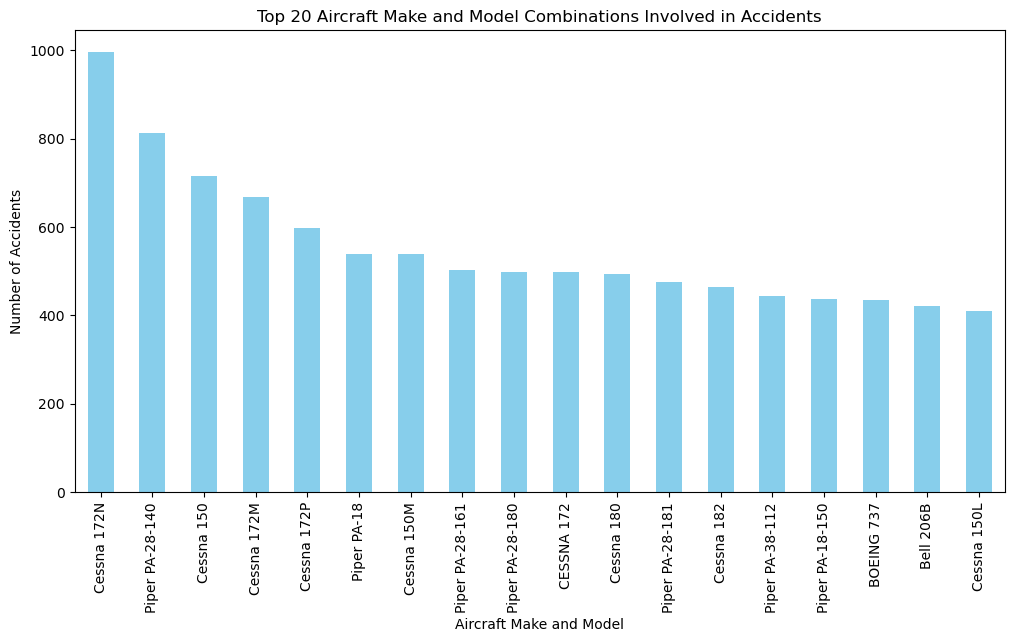

In [30]:
#Plotting a bar chart to represent this information.
top_20_make_models=df['Make_Model'].value_counts().head(20)

Q1 = top_20_make_models.quantile(0.25)
Q3 = top_20_make_models.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_top_20_make_models = top_20_make_models[(top_20_make_models >= lower_bound) & (top_20_make_models <= upper_bound)]


plt.figure(figsize=(12, 6))

filtered_top_20_make_models.plot(kind='bar', color='skyblue')

plt.title('Top 20 Aircraft Make and Model Combinations Involved in Accidents')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Number of Accidents')

plt.show()

### 2. Analysis of the total injuries per each aircraft make and model.

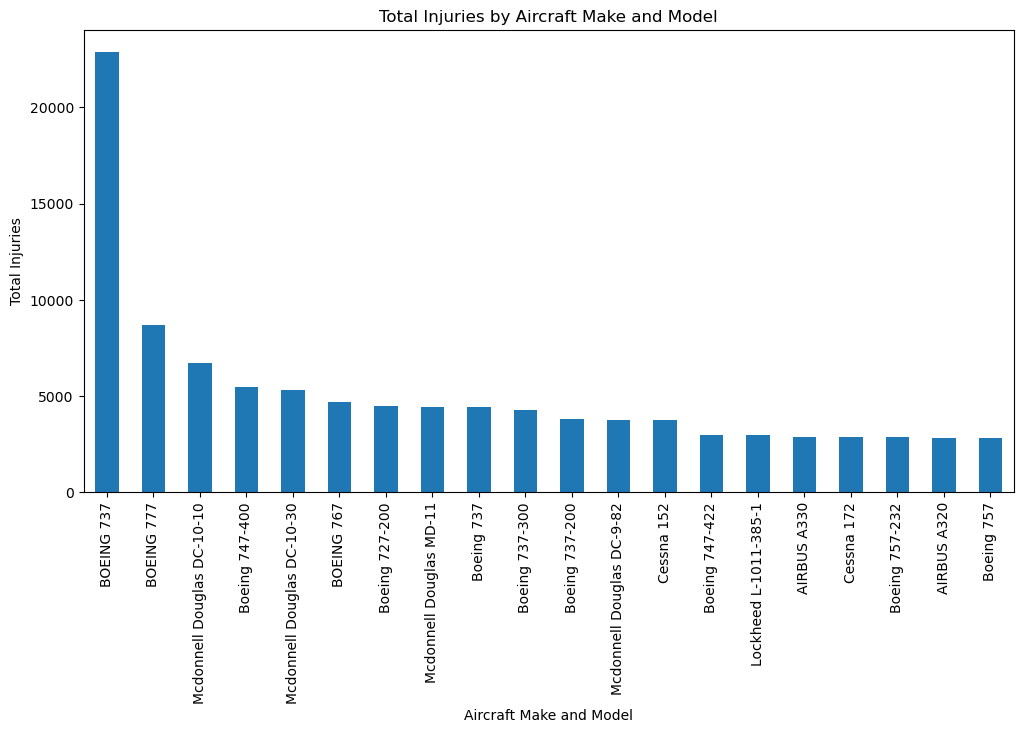

In [19]:
#We check how each aircraft make and model has an impact on injuries.
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']

make_model_injuries = df.groupby('Make_Model')['Total.Injuries'].sum().sort_values(ascending=False).head(20)


plt.figure(figsize=(12, 6))

make_model_injuries.plot(kind='bar')

plt.title('Total Injuries by Aircraft Make and Model')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Total Injuries')

plt.show()

### 3.Analysis of Weather Condition per Incident

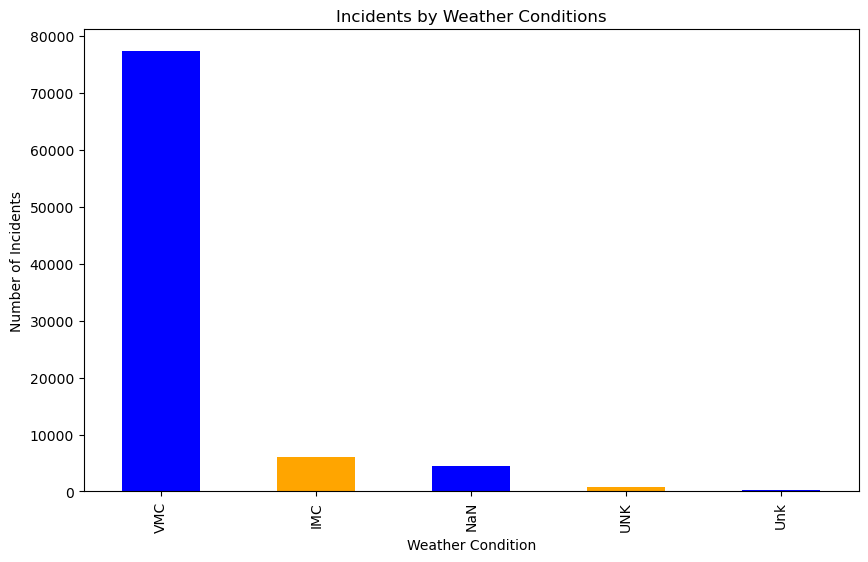

In [20]:
weather_incidents = df['Weather.Condition'].value_counts()

plt.figure(figsize=(10, 6))

weather_incidents.plot(kind='bar', color=['blue', 'orange'])

plt.title('Incidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Incidents')

plt.show()


## Interpretation and Insights


### From the above visualisations we could gain the following insights :
 
 
#### The 'CESSNA 182' Aircraft recording the least amount of acciedents that occured making it a favourable Aircraft to invest in.

####  We could tell the number of Injuries recorded per Aircraft.The highest number recorded was 'BOEING 737' while 'Boeing 757' recording the lowest number of Injuries.

#### We could show how different weather conditions can be factors leading to accidents caused by aircrafts.

